In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [104]:
df = pd.read_excel('/content/flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [105]:
df.shape

(10683, 11)

In [106]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [114]:
df.dropna(inplace=True)

In [108]:
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [109]:
df.shape

(10682, 11)

In [110]:
df.iloc[9684, :]

,9685
Airline,Jet Airways
Date_of_Journey,15/06/2019
Source,Banglore
Destination,Delhi
Route,BLR → DEL
Dep_Time,08:20
Arrival_Time,11:20
Duration,3h
Total_Stops,non-stop
Additional_Info,No info


In [111]:
def chage_timm(time):
    if 'h' in time and 'm' in time:
        hours, minuts = time.split('h')
        hours = int(hours.strip())
        minuts = int(minuts.replace('m', '').strip())

        # convert to decimals
        time_min = (hours*60) + minuts

        return time_min

    if 'h' in time:
        if len(time) > 2:
            return int(time[0:2])*60
        else:
            return int(time[0])*60
print(chage_timm('20h'))

1200


In [112]:
df['taking_time'] = df['Duration'].apply(chage_timm)

In [115]:
df['taking_time'].isnull().sum()

0

In [116]:
df['taking_time'] = df['taking_time'].astype(int)

In [117]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,taking_time
4209,Multiple carriers,9/06/2019,Delhi,Cochin,DEL → HYD → COK,07:05,16:10,9h 5m,1 stop,No info,9646,545
5783,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,12:30,09:25 28 Jun,20h 55m,1 stop,No info,7480,1255
7084,IndiGo,6/06/2019,Banglore,Delhi,BLR → DEL,23:30,02:20 07 Jun,2h 50m,non-stop,No info,4591,170
3664,Air Asia,15/03/2019,Kolkata,Banglore,CCU → BLR,10:20,12:55,2h 35m,non-stop,No info,4384,155
9468,IndiGo,3/03/2019,Delhi,Cochin,DEL → HYD → COK,11:55,22:20,10h 25m,1 stop,No info,11600,625


In [118]:
df.shape

(10681, 12)

In [119]:
df.describe()

,Price,taking_time
count,10681.000000,10681.000000
mean,9086.443123,643.080236
std,4611.075357,507.816377
min,1759.000000,75.000000
25%,5277.000000,170.000000
50%,8372.000000,520.000000
75%,12373.000000,930.000000
max,79512.000000,2860.000000


In [120]:
df[['Price', 'taking_time']].head()

,Price,taking_time
0,3897,170
1,7662,445
2,13882,1140
3,6218,325
4,13302,285


In [121]:
df[['Price', 'taking_time']].corr()

,Price,taking_time
Price,1.000000,0.506803
taking_time,0.506803,1.000000


<Axes: >

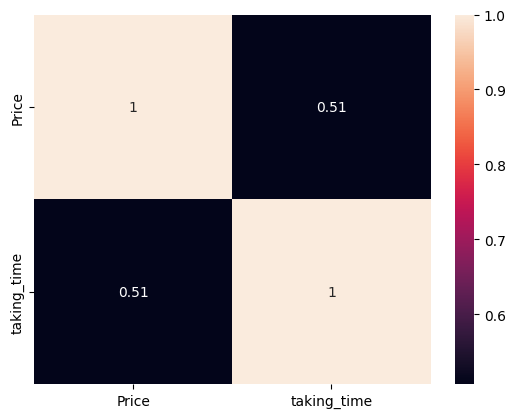

In [122]:
sns.heatmap(df[['Price', 'taking_time']].corr(), annot=True)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
 11  taking_time      10681 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [124]:
df['Date_of_Journey'].head()

,Date_of_Journey
0,24/03/2019
1,1/05/2019
2,9/06/2019
3,12/05/2019
4,01/03/2019


In [125]:
# Feature Engineering

df['date'] = df['Date_of_Journey'].str.split('/').str[0]
df['month'] = df['Date_of_Journey'].str.split('/').str[1]
df['year'] = df['Date_of_Journey'].str.split('/').str[2]

In [126]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,taking_time,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,01,03,2019


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
 11  taking_time      10681 non-null  int64 
 12  date             10681 non-null  object
 13  month            10681 non-null  object
 14  year             10681 non-null  object
dtypes: int64(2), object(13)
memory usage: 1.6+ MB


In [128]:
df.shape

(10681, 15)

In [129]:
df['date'] = df['date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Date_of_Journey  10681 non-null  object
 2   Source           10681 non-null  object
 3   Destination      10681 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10681 non-null  object
 6   Arrival_Time     10681 non-null  object
 7   Duration         10681 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10681 non-null  object
 10  Price            10681 non-null  int64 
 11  taking_time      10681 non-null  int64 
 12  date             10681 non-null  int64 
 13  month            10681 non-null  int64 
 14  year             10681 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 1.6+ MB


In [131]:
df.describe()

,Price,taking_time,date,month,year
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.0
mean,9086.443123,643.080236,13.509784,4.708735,2019.0
std,4611.075357,507.816377,8.479449,1.164345,0.0
min,1759.000000,75.000000,1.000000,3.000000,2019.0
25%,5277.000000,170.000000,6.000000,3.000000,2019.0
50%,8372.000000,520.000000,12.000000,5.000000,2019.0
75%,12373.000000,930.000000,21.000000,6.000000,2019.0
max,79512.000000,2860.000000,27.000000,6.000000,2019.0


In [132]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [133]:
df.drop('Duration', axis=1, inplace=True)

In [134]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,taking_time,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,170,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,445,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,1140,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,325,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,285,1,3,2019


In [135]:
x = df['taking_time']
y = df['Price']

coef = np.polyfit(x, y, 1)
m, b = coef

line = m * x + b

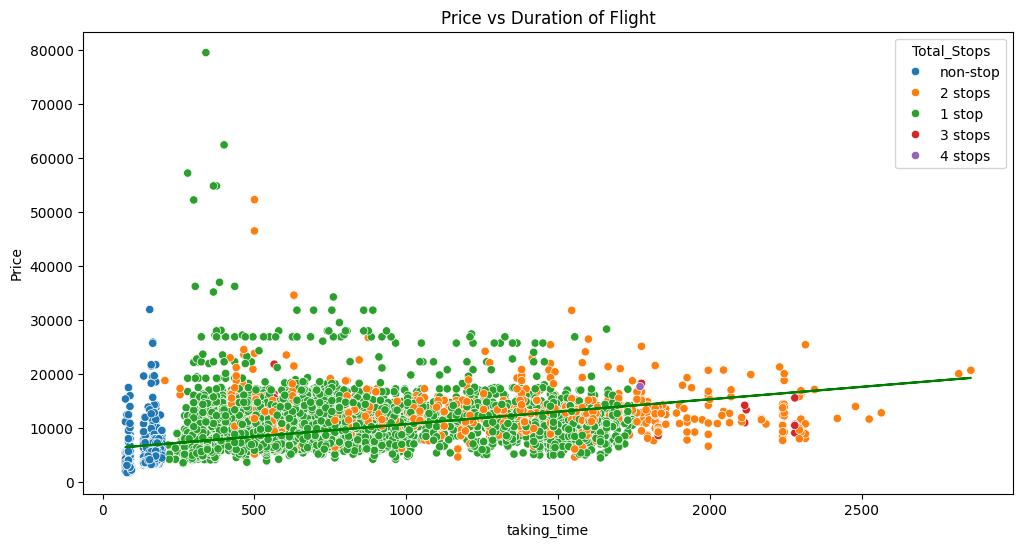

In [136]:
## Find out relationship between Duration vs price

plt.figure(figsize=(12,6))
sns.scatterplot(x='taking_time', y='Price', data=df, hue='Total_Stops')
plt.plot(x, line, color='green')
plt.title('Price vs Duration of Flight')
plt.show()

In [137]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,taking_time,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,170,24,3,2019


In [138]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [139]:
df['Arrival_hours'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(':').str[1]

In [140]:
df.sample(8)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,taking_time,date,month,year,Arrival_hours,Arrival_min
2519,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,1 stop,In-flight meal not included,10844,365,15,5,2019,22,35
2018,Jet Airways,Delhi,Cochin,DEL → BOM → COK,02:15,19:00,1 stop,In-flight meal not included,10262,1005,27,6,2019,19,00
821,Jet Airways,Delhi,Cochin,DEL → JAI → BOM → COK,19:30,12:35,2 stops,In-flight meal not included,13029,1025,9,5,2019,12,35
2077,IndiGo,Banglore,Delhi,BLR → DEL,18:55,21:50,non-stop,No info,4823,175,18,5,2019,21,50
630,Air India,Banglore,New Delhi,BLR → HYD → DEL,17:00,12:15,1 stop,No info,10246,1155,1,3,2019,12,15
4859,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15,2 stops,No info,10651,1275,9,6,2019,19,15
1281,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,19:00,01:30,1 stop,No info,6795,390,15,6,2019,01,30
3504,Jet Airways,Delhi,Cochin,DEL → BOM → COK,22:50,04:25,1 stop,No info,15554,335,9,5,2019,04,25


In [141]:
df['Dep_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_min'] = df['Dep_Time'].str.split(':').str[1]

In [142]:
df['Arrival_hours'] = df['Arrival_hours'].astype(int)
df['Arrival_min'] = df['Arrival_min'].astype(int)
df['Dep_hour'] = df['Dep_hour'].astype(int)
df['Dep_min'] = df['Dep_min'].astype(int)

In [143]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,taking_time,date,month,year,Arrival_hours,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,non-stop,No info,3897,170,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,445,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,2 stops,No info,13882,1140,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,325,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,285,1,3,2019,21,35,16,50


In [144]:
df.drop('Arrival_Time', axis=1, inplace=True)
df.drop('Dep_Time', axis=1, inplace=True)

In [145]:
df.shape

(10681, 15)

In [146]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,taking_time,date,month,year,Arrival_hours,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,170,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,445,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,1140,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,325,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,285,1,3,2019,21,35,16,50


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  object
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   taking_time      10681 non-null  int64 
 8   date             10681 non-null  int64 
 9   month            10681 non-null  int64 
 10  year             10681 non-null  int64 
 11  Arrival_hours    10681 non-null  int64 
 12  Arrival_min      10681 non-null  int64 
 13  Dep_hour         10681 non-null  int64 
 14  Dep_min          10681 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.6+ MB


In [148]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [103]:
data = pd.read_excel('/content/flight_price.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [149]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [150]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,taking_time,date,month,year,Arrival_hours,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,170,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,445,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,1140,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,325,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,285,1,3,2019,21,35,16,50


In [151]:
df.iloc[2, :]

,2
Airline,Jet Airways
Source,Delhi
Destination,Cochin
Route,DEL → LKO → BOM → COK
Total_Stops,2
Additional_Info,No info
Price,13882
taking_time,1140
date,9
month,6


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10681 non-null  object
 1   Source           10681 non-null  object
 2   Destination      10681 non-null  object
 3   Route            10681 non-null  object
 4   Total_Stops      10681 non-null  int64 
 5   Additional_Info  10681 non-null  object
 6   Price            10681 non-null  int64 
 7   taking_time      10681 non-null  int64 
 8   date             10681 non-null  int64 
 9   month            10681 non-null  int64 
 10  year             10681 non-null  int64 
 11  Arrival_hours    10681 non-null  int64 
 12  Arrival_min      10681 non-null  int64 
 13  Dep_hour         10681 non-null  int64 
 14  Dep_min          10681 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [157]:
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder()
Encoder.fit_transform(df[["Airline", 'Source', 'Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [158]:
pd.DataFrame(Encoder.fit_transform(df[["Airline", 'Source', 'Destination']]).toarray(), columns=Encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10677,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10678,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
